In [1]:
!which python3

/Users/karthikmaddukuri/anaconda3/envs/churn-model/bin/python3


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Standard imports
import os
import pickle
import sys
sys.path.append('..')  #To let jupyter notebook to look one folder up

#Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import ( AdaBoostClassifier, GradientBoostingClassifier, 
                              RandomForestClassifier
                             )
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier

#Local imports
from src.localpaths import *
from src.data.make_dataset import load_training_data
from src.models.train_model import *

In [4]:
#Configuration for notebooks

# pd.options.display.max_columns = 100
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Load Featurized Data 

In [5]:
X_train, y_train = load_training_data(final=True)

# Load model results

In [6]:
model_results = load_model_results()

In [7]:
model_results.sort_values(by='roc_auc', ascending=False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
33,201006169414151680.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.802724,0.669380,0.495683,0.569039,0.846669
32,1338764528172069376.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
4,1017545180110469376.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
5,1126852098189955072.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
31,811529812254492928.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
11,1509884050712260864.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
24,158305255602119168.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
1,2241896888290486528.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
15,382662255737366528.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
28,2183524338018462976.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914


# Load Final Model


In [8]:
model = load_pickled_model('201006169414151680.pkl')

In [9]:
most_important_features = sorted(zip(X_train.columns, model.feature_importances_), key = lambda x:x[1], reverse=True)
most_important_features

[('tenure', 0.4),
 ('MultipleLines_Yes', 0.06666666666666667),
 ('MultipleLines_No phone service', 0.05925925925925926),
 ('StreamingMovies_Yes', 0.05925925925925926),
 ('Contract_One year', 0.05185185185185185),
 ('InternetService_Fiber optic', 0.044444444444444446),
 ('StreamingTV_Yes', 0.044444444444444446),
 ('StreamingMovies_No internet service', 0.044444444444444446),
 ('PaperlessBilling', 0.037037037037037035),
 ('OnlineSecurity_Yes', 0.037037037037037035),
 ('Contract_Two year', 0.037037037037037035),
 ('TechSupport_Yes', 0.02962962962962963),
 ('SeniorCitizen', 0.022222222222222223),
 ('PaymentMethod_Mailed check', 0.022222222222222223),
 ('Dependents', 0.014814814814814815),
 ('OnlineBackup_Yes', 0.014814814814814815),
 ('PaymentMethod_Electronic check', 0.014814814814814815),
 ('gender', 0.0),
 ('Partner', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('PaymentMethod_Credit card (automatic)', 0.0)]

# Partial Dependence plots


This shows us the direction of influence of each feature towards the target variable (i.e if influencing to churn or to stay)

/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/inspection/_partial_dependence.py:950: UserWarning: Attempting to set identical bottom == top == 0.4843663611247471 results in singular transformations; automatically expanding.
  axi.set_ylim(self.pdp_lim[1])
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/inspection/_partial_dependence.py:950: UserWarning: Attempting to set identical bottom == top == 0.4843663611247471 results in singular transformations; automatically expanding.
  axi.set_ylim(self.pdp_lim[1])
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/inspection/_partial_dependence.py:950: UserWarning: Attempting to set identical bottom == top == 0.4843663611247471 results in singular transformations; automatically expanding.
  axi.set_ylim(self.pdp_lim[1])
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/inspection/_partial_de

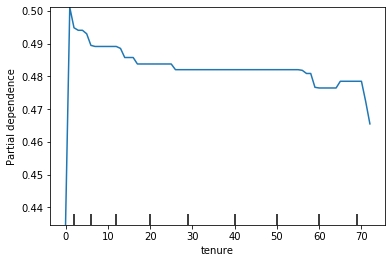

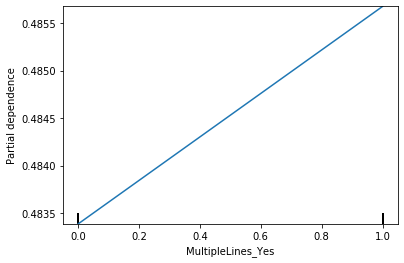

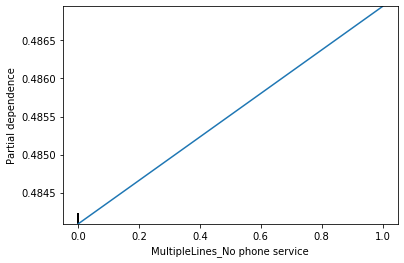

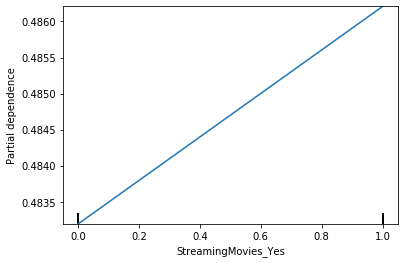

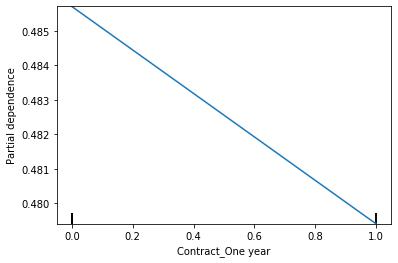

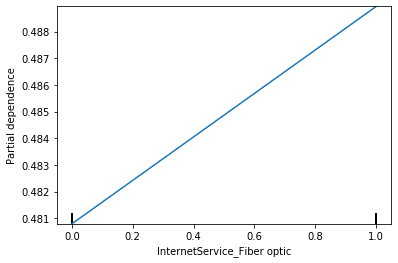

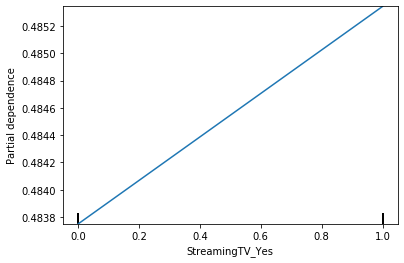

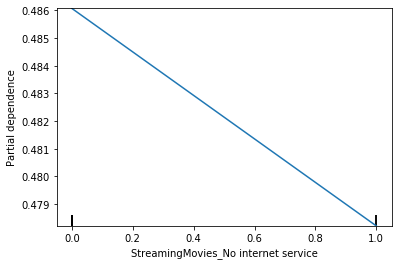

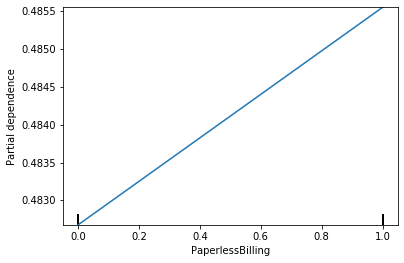

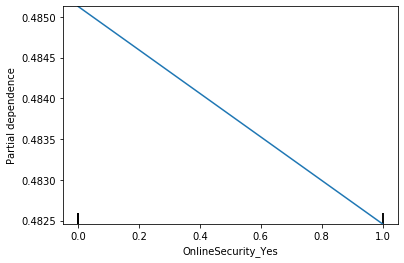

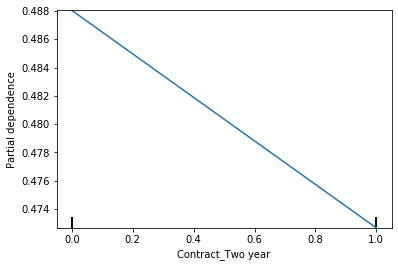

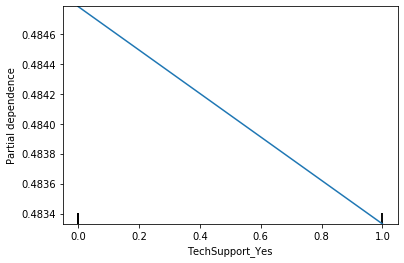

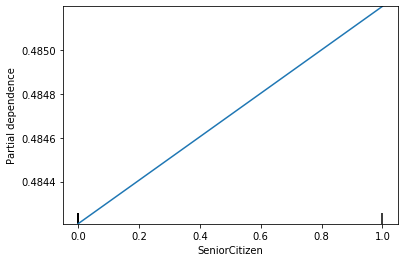

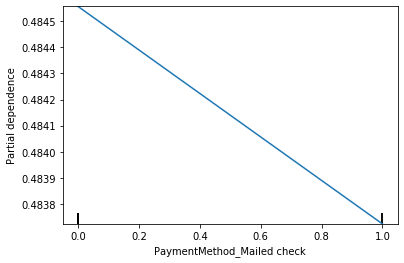

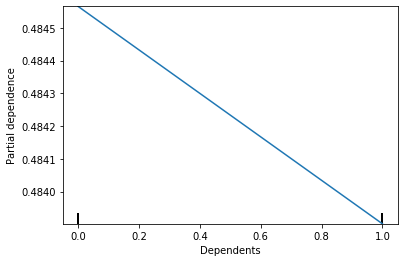

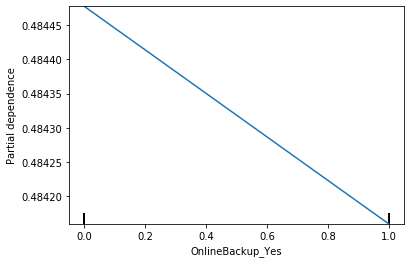

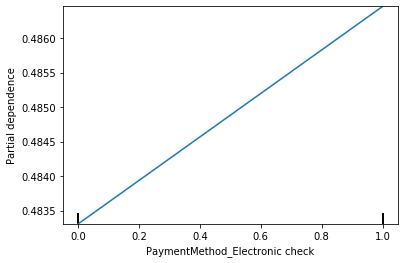

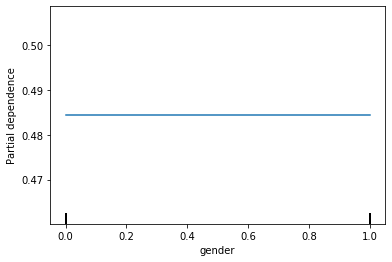

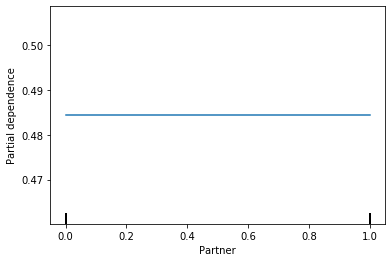

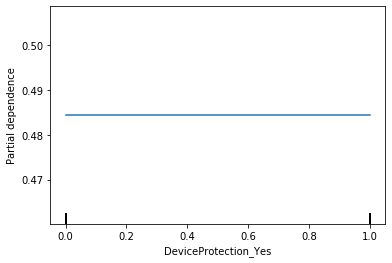

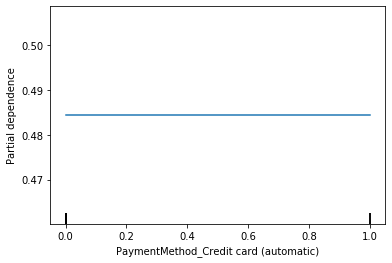

In [10]:
for col, _ in most_important_features[:]:
    plot_partial_dependence(model, X_train, [col])

## Exploring 4 features with positive and negative correlation with Churn

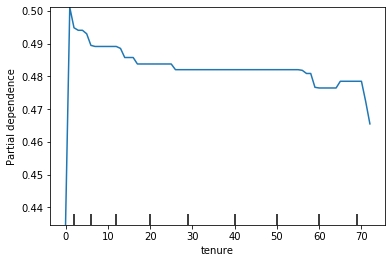

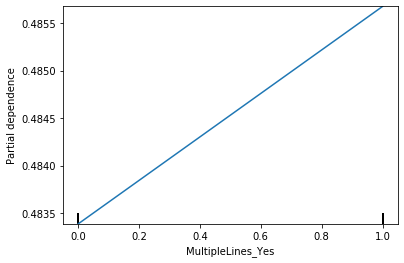

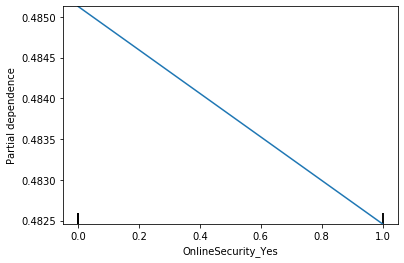

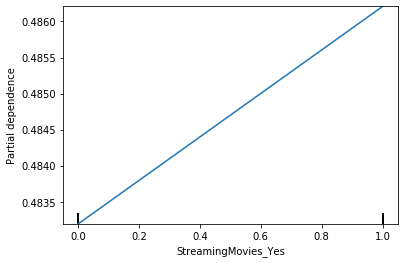

In [11]:
cols = ['tenure', 'MultipleLines_Yes', 'OnlineSecurity_Yes','StreamingMovies_Yes']
for col in cols:
    plot_partial_dependence(model, X_train, [col])
    plt.savefig(REPORTS_DIRECTORY + f'/{col}')
